In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

<font face="微软雅黑" size=5 color=#A52A2A > 读取图像

In [2]:
image_path = 'E:\原始图像.png'
image=Image.open(image_path)

In [3]:
image_np = np.array(image)   # 将图像转换为NumPy数组
h, w, c = image_np.shape        # 获取图像的尺寸
h,w,c

(430, 643, 4)

<font face="微软雅黑" size=5 color=#A52A2A >将图像压缩,每行代表一个像素的RGB值

In [4]:
compress_image = image_np.reshape(h*w, c)
rgb_image = compress_image[:, :3] #忽略Alpha通道

In [5]:
rgb_image[:5] #显示数组

array([[190, 226, 237],
       [190, 226, 237],
       [191, 226, 237],
       [191, 226, 237],
       [191, 226, 237]], dtype=uint8)

<font face="微软雅黑" size=6 color=#A52A2A > KMeans类

In [6]:
class KMeans:
    def __init__(self,k_num,iter,error):
        self.k_num = k_num   #聚类的数量
        self.iter = iter     #最大迭代次数
        self.error = error   #收敛的阈值

    def train(self,data):
        # 随机选择k_num个样本作为初始质心
        cluster_center = data[np.random.choice(data.shape[0], self.k_num, replace=False)]
        for _ in range(self.iter):
            # 计算所有样本到所有质心的欧氏距离的平方
            distances = np.sum(np.square(data[:, np.newaxis] - cluster_center), axis=-1)
            result = np.argmin(distances, axis=1) # 为每个样本分配最近的质心，即最小距离对应的质心索引
            # 计算每个聚类的新质心，即每个聚类内所有样本的平均值
            new_cluster_center = np.array([data[result == k].mean(axis=0) for k in range(self.k_num)])
            # 如果变化小于预设的误差阈值，则算法收敛，跳出循环
            if np.linalg.norm(cluster_center - new_cluster_center) < self.error:
                break
            cluster_center = new_cluster_center # 更新质心为新计算的质心
        return result

<font face="微软雅黑" size=5 color=#A52A2A >进行聚类

In [7]:
# 创建KMeans实例进行聚类
kmeans = KMeans(5,500,1e-5)
train_re = kmeans.train(rgb_image)
# 将聚类标签转换为转为原图尺寸
restore_image = train_re.reshape(h,w)

In [8]:
restore_image

array([[4, 4, 4, ..., 4, 4, 4],
       [2, 2, 2, ..., 2, 2, 4],
       [2, 2, 2, ..., 2, 2, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=int64)

<font face="微软雅黑" size=5 color=#A52A2A > 显示结果

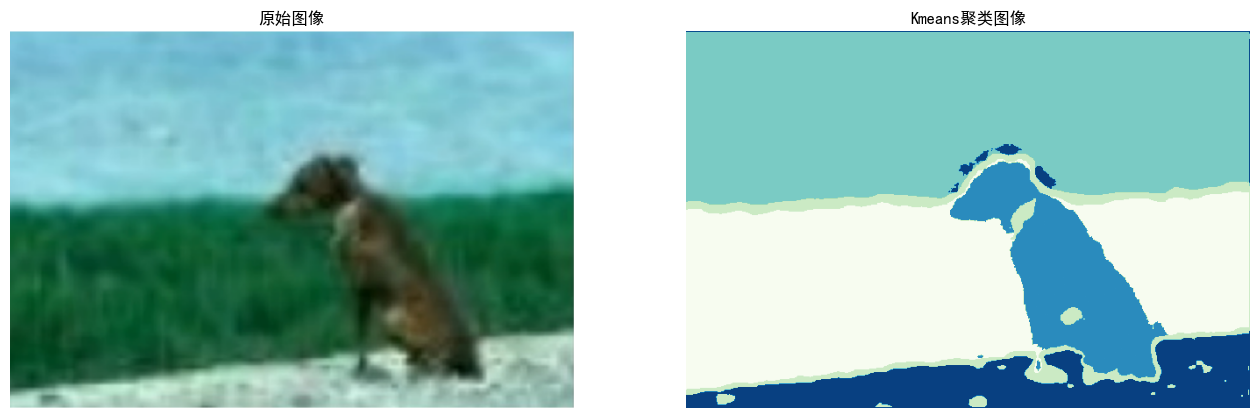

In [9]:
# 显示图像
plt.figure(figsize=(16,10))
plt.subplot(1,2,1) 
plt.imshow(image)
plt.title('原始图像')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(restore_image,cmap='GnBu')
plt.title('Kmeans聚类图像')
plt.axis('off')
plt.show()